# IQ-Modulation und -Demodulation

Ein großer Vorteil einer digitalen IQ-Mischstufe ist die hohe Präzision beim digitalen Mischen, die mit analogen IQ-Mischern kaum erreicht werden kann.
In einem Vortrag über den Mercury SDR-Receiver gibt Phil Harman VK6PH einige Werte für die Amplituden- und Phasengenauigkeit an (in diesem [Video](https://youtu.be/0LJpD9T1KgE) ab 00:22), die für eine bestimmte Spiegelfrequenzunterdrückung notwendig sind:


| Rejection | Phase(deg) | Amplitude (dB) |
|-----------|------------|----------------|
|   40 dB   | 1.0        |     0.1        |
|   60 dB   | 0.1        |     0.01       |
|   80 dB   | 0.01       |     0.001      |
|  100 dB   | 0.001      |     0.0001     |


Wie man sich leicht vorstellen kann, sind solche Amplituden- und Phasengenauigkeiten mit analogen Schaltungen, die mehrere Amateurfunkbänder abdecken sollen und Temperaturschwankungen, Vibrationen und Bauteilealterung ausgesetzt sind, ziemlich unerreichbar.

## So funktioniert ein IQ-Empfangsmischer ##

An der Antenne kommt ein Signal mit der Frequenz $ \omega_{1} $ an.
Dieses Signal soll den zeitlichen Verlauf

$ U_{Ant}(t) = \cos ( \omega_{1} t ) $

haben und am Eingang des IQ-Mischers anliegen.
Es ist hierbei egal, ob das Signal bereits digitalisiert wurde oder ob es sich um ein Analogsignal handelt, die Mathematik ist die gleiche.
Die Amplitude ist auch erst mal egal; wir setzen die Amplitude auf 1, dann müssen wir weniger schreiben.

Der IQ-Mischer besteht aus zwei Multiplizierern.

Diese beiden Multiplizierer sind an einen lokalen Oszillator angeschlossen, der mit der Kreisfrequenz $ \omega_{0} $ schwingt und der 2 Ausgänge hat: Der eine Multiplizierer, nennen wir ihn den I-Multiplizierer, ist am 0°-Ausgang des lokalen Oszillators angeschlossen und der andere Multiplizierer, der Q-Multiplizierer, am 90°-Ausgang.

Die Amplituden sollen auch erst mal wieder keine Rolle spielen und werden der Einfachheit halber auf 1 gesetzt.

Das LO-Signal am I-Multiplizierer soll also 

$ U_{LO,I}(t) = \cos ( \omega_{0} t ) $

sein und das Signal am Q-Multiplizierer soll sein

$ U_{LO,Q}(t) = \cos (\omega_{0} t + 90° ) = - \sin ( \omega_{0} t ) $


Am Ausgang der Multiplizierer erscheinen dann die Produkte I und Q:

$ I = \cos ( \omega_{1} t ) \cos ( \omega_{0} t ) $

$ Q = - \cos ( \omega_{1} t ) \sin ( \omega_{0} t ) $

Jetzt wenden wir zwei Theoreme für Produkte von Winkelfunktionen an, nämlich 

$ \cos x \; \cos y = \frac{1}{2}\Big(\cos (x-y) + \cos (x+y)\Big) $  

und

$ \sin x \; \cos y = \frac{1}{2}\Big(\sin (x-y) + \sin (x+y)\Big) $

und erhalten

$ I = \frac{1}{2} \cos ( \omega_{1} + \omega_{0} )t + \frac{1}{2} \cos ( \omega_{1} - \omega_{0} )t $

$ Q = - \frac{1}{2} \sin ( \omega_{1} + \omega_{0} )t + \frac{1}{2} \sin ( \omega_{1} - \omega_{0} )t $


## So funktioniert SSB-Demodulation mit IQ-Signalen ##

Um aus dem IQ-Signal, das von einem SSB-modulierten Sender stammt, das ursprüngliche Modulationssignal zu demodulieren, muss man das Q-Signal um 90° in der Phase verschieben.

Ein breitbandige Phasenverschiebung (mit der Bandbreite des Modulationssignals) ist mit analogen Schaltungstechniken aufwendig, aber möglich, z.B. mit audio phasing networks nach [W2WAM](https://en.wikipedia.org/wiki/Robert_B._Dome). In diesem Fall ist es vorteilhafter, das I-Signal um -45° zu schieben und das Q-Signal um +45°; wichtig ist nur die Phasendifferenz von Q nach I; die muss 90° sein.
In der digitalen Signalverarbeitung bewirkt man die Phasenverschiebung mit einem sog. Hilbert-Tranformator, der als FIR-Filter mit bestimmten [Koeffizienten](https://de.wikipedia.org/wiki/Hilbert-Transformation#Berechnung_mit_FIR-Filter) realisiert werden kann.
Auch im digitalen Fall muss man aufpassen: Der Hilbert-Transformator für das Q-Signal hat eine bestimmte Verzögerungszeit; auch das I-Signal muss um diese gleiche Zeit verzögert werden, was man ebenfalls mit einem FIR-Filter erreichen kann.  

Rechnerisch haben wir es dagegen bequem: Wir müssen nur 90° zum Q-Signal addieren und erhalten das Signal

$ Q' = - \frac{1}{2} \sin ( \omega_{1} t + \omega_{0} t + 90°) + \frac{1}{2} \sin ( \omega_{1} t - \omega_{0} t +90°) $

$ Q' = - \frac{1}{2} \cos ( \omega_{1} + \omega_{0} )t + \frac{1}{2} \cos ( \omega_{1} - \omega_{0} )t $


### LSB ###

Um das untere Seitenband zu erhalten, müssen wir nur noch das $ I $ - und das $ Q' $-Signal addieren:

$ LSB = I + Q' = \cos ( \omega_{1} - \omega_{0} )t $

### USB ###

Für das obere Seitenband müssen wir das $ Q' $ - Signal vom $ I $-Signal abziehen:

$ USB = I - Q' = \cos ( \omega_{1} + \omega_{0} )t $

## SSB-Demodulation bei Phasen- und Amplitudenfehlern ##

Bisher war alles perfekt: Die beiden Mischer funktionierten als perfekte Multiplizierer und die beiden Ausgänge des Lokaloszillators waren exakt um 90° phasenverschoben zueinander und lieferten exakt gleiche Amplituden.

Weder Analogmultiplizierer noch analoge Quadraturoszillatoren funktionieren aber so perfekt.

Um einen Phasenfehler zu simulieren, sollen die beiden Ausgänge des Oszillators jetzt nicht mehr exakt eine
Phasendifferenz von $ 90° $ besitzen, sondern eine Phasendifferenz von $ 90° + \Delta \phi $.

Um einen Amplitudenfehler zu simulieren, soll das LO-Signal am Q-Mischer eine etwas andere Amplitude haben als 1.

Insgesamt soll also das Signal, das am Q-Mischer anliegt, um $ 90 ° $ und ein bisschen was dazu ($ \Delta \phi$) phasenverschoben sein und eine Amplitude $ a $ besitzen, wobei $ a \approx 1 $ sein soll:

$ U_{LO,Q}(t) = a \cos( \omega_{0} t + 90° + \Delta \phi ) = -a \sin( \omega_{0} t + \Delta \phi ) $

wobei hier  $ \cos( x + 90° ) = - \sin x $ zur Anwendung kam.

Mit dem folgenden Code kann man die Signale des lokalen Oszillators plotten:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

deltat = 1e-9 # Sample period in seconds
fs = 1/deltat
t = np.arange(0, 1e-6-deltat, deltat)
lo_frequency=6070000

u_lo_i = np.cos(2*np.pi*lo_frequency*t)
fig, ax = plt.subplots()

a = 0.9
deltaphi = 0

u_lo_q = - a * np.sin(2*np.pi*lo_frequency*t + deltaphi)

ax.plot(t*10e6,u_lo_i, t*10e6, u_lo_q)
ax.set_xlabel('time (us)')
ax.set_ylabel('Amplitude')
ax.set_ylim((-1.1, 1.1))

(-1.1, 1.1)

Als Nächstes werden ein paar Helper-Funktionen definiert, die wir gleich noch brauchen werden:

In [2]:
def fftwin(s):
    return (np.blackman(len(s))) # other windows can be tried here

def calcdBFFT(s):
    s_fft = np.fft.fft(s * fftwin(s))
    s_dB = 20 * np.log10(np.abs(s_fft)+1e-200)
    return s_dB

def plotfft(ax, s, xlim1, xlim2,titlestr, xticklist, mutelist=[]):
    s_dB = calcdBFFT(s)
    freqs = np.fft.fftfreq(len(s), d=deltat)
    l, = ax.plot(freqs/1000, s_dB)
    ax.set_xlim(xlim1/1000, xlim2/1000)
    ax.set_ylim(-100,100)
    ax.set_xlabel('kHz')
    ax.xaxis.set_label_coords(1.02, -0.06)
    ax.set_xticks(xticklist)
    ax.set_title(titlestr)
    ax.grid(True)
    return l

Im nächsten Code-Schnipsel werden 2 Signale erzeugt: Ein USB-Signal und ein LSB-Signal.
Das USB-Signal besteht aus einem Ton bei 300 Hz mit der Amplitude 0.1, einem Ton bei 1650 Hz mit der Amplitude 0.8 und einem Ton bei 3 KHz mit der Amplitude 1.
Das LSB-Signal besteht aus einem Ton bei 400 Hz mit der Amplitude 0.2, einem Ton bei 1500 Hz mit der Amplitude 1.6 und einem Ton bei 2.5 KHz mit der Amplitude 1.8.
Die Modulationssignale haben unterschiedliche Frequenzen und Amplituden, damit man sie später besser unterscheiden kann.
Die Modukationssignale werden auf einen Träger von 80 kHz aufmoduliert:

In [3]:
usb = [[300,0.1],[1650,0.8],[3000,1]]   # USB frequencies and amplitudes
lsb = [[400,0.2],[1500,1.6],[2500,1.8]] # LSB frequencies and amplitudes
fc = 80000                              # Tx frequency, carrier frequency
c = 1                                   # carrier amplitude
fs = 2e6                                # sampling frequency
maxtim = 0.1                            # duration of the sampling block
deltat = 1/fs
t = np.arange(0, maxtim-deltat, deltat) # array of sampling times

ssb = np.zeros(len(t))                  # generating USB and LSB signals
for [freq, amp] in usb:
    ssb += amp*np.cos(2*np.pi*(freq+fc)*t)
for [freq, amp] in lsb:
    ssb += amp*np.cos(2*np.pi*(freq-fc)*t)

Mit den folgenden Code-Zeilen wird das Spektrum am Empfängereingang geplottet:

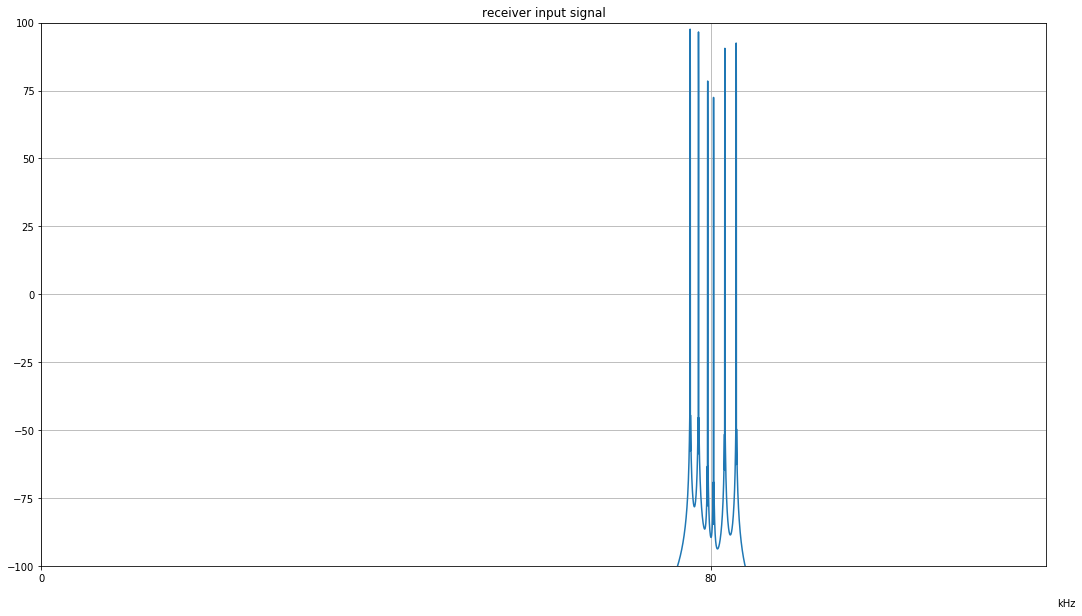

In [4]:
plt.rcParams['figure.figsize'] = [18, 10]
fig, ax = plt.subplots()
#plotfft(ax,ssb,-1.5*fc,1.5*fc,"receiver input signal",[-80,0,80]) # uncomment line and comment next line for neg. frequencies
plotfft(ax,ssb,0,1.5*fc,"receiver input signal",[0,80])

Das folgende Kommando ermöglicht die Ausgabe einer interaktiven Grafik im eigenen Fenster:

In [5]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


Mit den folgenden Code-Zeilen wird eine interaktive Grafik erzeugt.
Mit einem Slider kann man die Amplitude und die Phase des  $ Q' $-Signals verändern und beobachten, wie die Spiegelfrequenzunterdrückung mit zunehmender Abweichung von den Idealwerten sehr rasch schlechter wird.
Ein digitaler Mischer in Verbindung mit einem NCO (Numerically Controlled Oscillator) als Quadraturoszillator und einem Hilbert-Transformator hat diese Probleme nicht!

In [6]:
I = np.zeros(len(t))                    # calculating In-Phase Output
for [freq, amp] in usb:
    I += 0.5*amp*np.cos(2*np.pi*(freq+fc+fc)*t) + \
    0.5*amp*np.cos(2*np.pi*(freq+fc-fc)*t)
for [freq, amp] in lsb:
    I += 0.5*amp*np.cos(2*np.pi*(freq+fc+fc)*t) + \
    0.5*amp*np.cos(2*np.pi*(freq+fc-fc)*t)
    
from matplotlib.widgets import Slider, Button

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5, left=0.1, bottom=0.25)

axcolor = 'lightgoldenrodyellow'
axphs = plt.axes([0.1, 0.1, 0.75, 0.03], facecolor=axcolor)
axamp = plt.axes([0.1, 0.15, 0.75, 0.03], facecolor=axcolor)

sphs = Slider(axphs, 'phase err',-1.0,1.0,
              valinit=0,valfmt='%1.4f', valstep=0.001)
samp = Slider(axamp, 'amplitude err',0.99,1.01,
              valinit=1.0,valfmt='%1.4f',valstep=0.0001)

def calcQbar(ampQ, deltaPhiQ):          # calculating Quadrature Output
    Qbar = np.zeros(len(t))
    for [freq, amp] in usb:
        Qbar += ampQ*(-0.5*amp*np.cos(2*np.pi*(freq+fc+fc)*t+deltaPhiQ) - \
                0.5*amp*np.cos(2*np.pi*(freq+fc-fc)*t-deltaPhiQ))
    for [freq, amp] in lsb:
        Qbar += ampQ*(-0.5*amp*np.cos(2*np.pi*(freq+fc+fc)*t+deltaPhiQ) + \
                0.5*amp*np.cos(2*np.pi*(freq+fc-fc)*t-deltaPhiQ))
    return Qbar

ampQ = 1.0                              
deltaPhiQ = 0
Qbar = calcQbar(ampQ, deltaPhiQ)

l1=plotfft(ax1,I+Qbar,-5000,5000,
           "USB:I+Q(-90°) demodulated baseband signal",[-4,-2,0,2,4])  # USB
l2=plotfft(ax2,I-Qbar,-5000,5000,
           "LSB: I-Q(-90°) demodulated baseband signal",[-4,-2,0,2,4]) # LSB

def update(val):
    ampQ = samp.val
    deltaPhiQ = sphs.val / 180.0 * np.pi
    Qbar = calcQbar(ampQ, deltaPhiQ)
    l1.set_ydata(calcdBFFT(I+Qbar)) # re-claculate USB spectrum
    l2.set_ydata(calcdBFFT(I-Qbar)) # re-calculate LSB spectrum
    fig.canvas.draw_idle()

sphs.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sphs.reset()
    samp.reset()
button.on_clicked(reset)

plt.show()